<a href="https://colab.research.google.com/github/ILMNX/machine-learning/blob/main/air-quality-kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import missingno as msno
from sklearn.impute import SimpleImputer

In [ ]:
dataset_url = "https://raw.githubusercontent.com/jhnwlkn/Bangkit/main/submission/data/airquality_data_aotizhongxin.csv"
data = pd.read_csv(dataset_url)

In [ ]:
print(data.head())

   PM2.5  PM10   SO2   NO2     CO    O3  TEMP    PRES  DEWP  RAIN   wd  WSPM  \
0    4.0   4.0   4.0   7.0  300.0  77.0  -0.7  1023.0 -18.8   0.0  NNW   4.4   
1    8.0   8.0   4.0   7.0  300.0  77.0  -1.1  1023.2 -18.2   0.0    N   4.7   
2    7.0   7.0   5.0  10.0  300.0  73.0  -1.1  1023.5 -18.2   0.0  NNW   5.6   
3    6.0   6.0  11.0  11.0  300.0  72.0  -1.4  1024.5 -19.4   0.0   NW   3.1   
4    3.0   3.0  12.0  12.0  300.0  72.0  -2.0  1025.2 -19.5   0.0    N   2.0   

        station             Datetime  
0  Aotizhongxin  2013-03-01 00:00:00  
1  Aotizhongxin  2013-03-01 01:00:00  
2  Aotizhongxin  2013-03-01 02:00:00  
3  Aotizhongxin  2013-03-01 03:00:00  
4  Aotizhongxin  2013-03-01 04:00:00  


In [ ]:
print(data.describe())

              PM2.5          PM10           SO2           NO2            CO  \
count  34139.000000  34346.000000  34129.000000  34041.000000  33288.000000   
mean      82.773611    110.060391     17.375901     59.305833   1262.945145   
std       82.135694     95.223005     22.823017     37.116200   1221.436236   
min        3.000000      2.000000      0.285600      2.000000    100.000000   
25%       22.000000     38.000000      3.000000     30.000000    500.000000   
50%       58.000000     87.000000      9.000000     53.000000    900.000000   
75%      114.000000    155.000000     21.000000     82.000000   1500.000000   
max      898.000000    984.000000    341.000000    290.000000  10000.000000   

                 O3          TEMP          PRES          DEWP          RAIN  \
count  33345.000000  35044.000000  35044.000000  35044.000000  35044.000000   
mean      56.353358     13.584607   1011.846920      3.123062      0.067421   
std       57.916327     11.399097     10.404047    

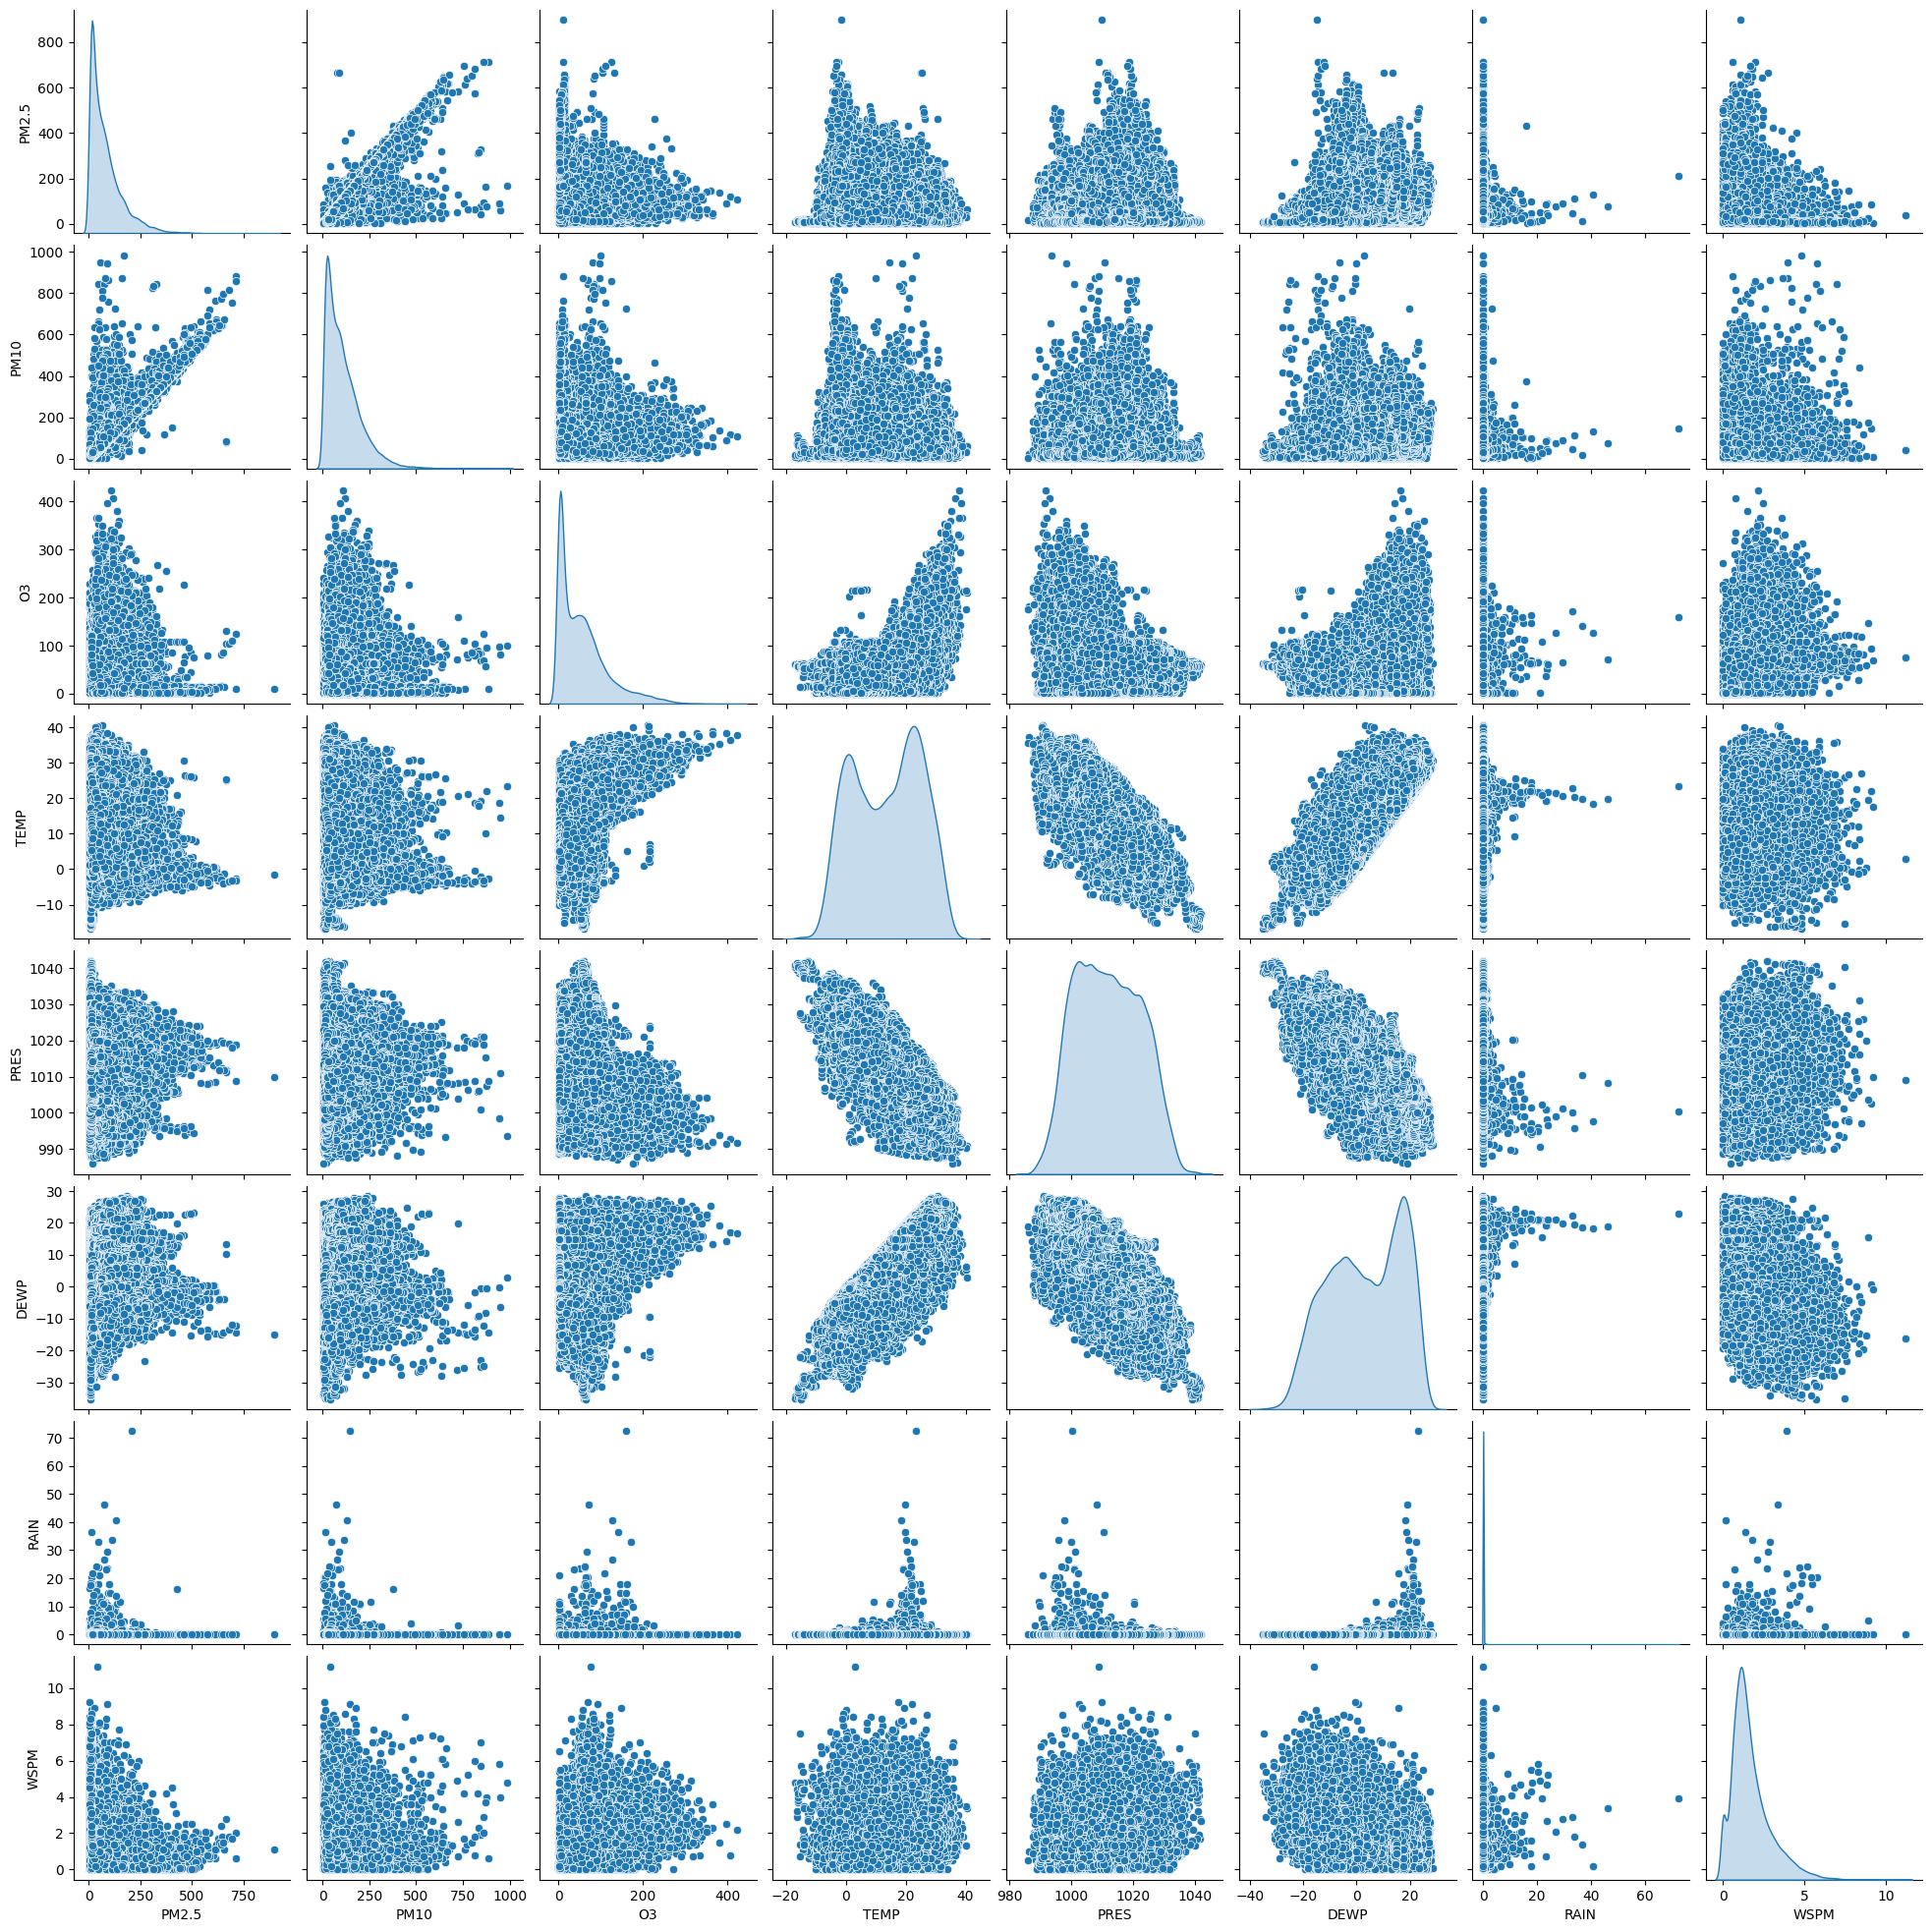

In [ ]:
sns.pairplot(data[["PM2.5", "PM10", "O3", "TEMP","PRES","DEWP","RAIN","WSPM" ]], diag_kind="kde")
plt.show()

In [ ]:
data.dropna(inplace=True)

scaler = StandardScaler()
scaled_data =(data.drop(columns=['Datetime', 'station', 'wd', 'WSPM']))

scaled_data = pd.DataFrame(scaled_data, columns=data.columns[:11])
scaled_data.drop_duplicates(inplace=True)

In [ ]:
# Drop rows with NaN values
data_cleaned = data.dropna()
print(data_cleaned)

       PM2.5  PM10   SO2   NO2     CO    O3  TEMP    PRES  DEWP  RAIN   wd  \
0        4.0   4.0   4.0   7.0  300.0  77.0  -0.7  1023.0 -18.8   0.0  NNW   
1        8.0   8.0   4.0   7.0  300.0  77.0  -1.1  1023.2 -18.2   0.0    N   
2        7.0   7.0   5.0  10.0  300.0  73.0  -1.1  1023.5 -18.2   0.0  NNW   
3        6.0   6.0  11.0  11.0  300.0  72.0  -1.4  1024.5 -19.4   0.0   NW   
4        3.0   3.0  12.0  12.0  300.0  72.0  -2.0  1025.2 -19.5   0.0    N   
...      ...   ...   ...   ...    ...   ...   ...     ...   ...   ...  ...   
35059   12.0  29.0   5.0  35.0  400.0  95.0  12.5  1013.5 -16.2   0.0   NW   
35060   13.0  37.0   7.0  45.0  500.0  81.0  11.6  1013.6 -15.1   0.0  WNW   
35061   16.0  37.0  10.0  66.0  700.0  58.0  10.8  1014.2 -13.3   0.0   NW   
35062   21.0  44.0  12.0  87.0  700.0  35.0  10.5  1014.4 -12.9   0.0  NNW   
35063   19.0  31.0  10.0  79.0  600.0  42.0   8.6  1014.1 -15.9   0.0  NNE   

       WSPM       station             Datetime  
0       4.4  A

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

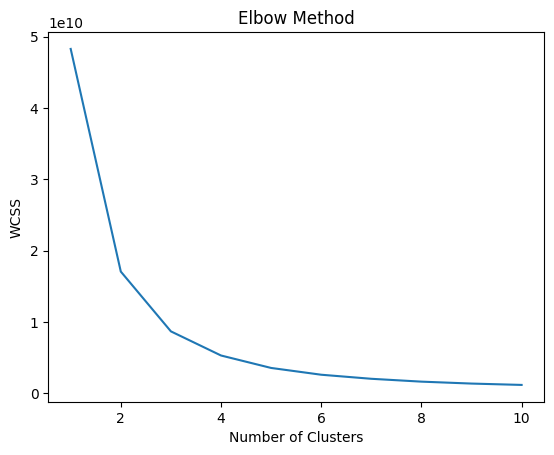

In [ ]:
imputer = SimpleImputer(strategy='mean')
scaled_data_imputed = imputer.fit_transform(scaled_data)

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data_imputed)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.6378397665386668


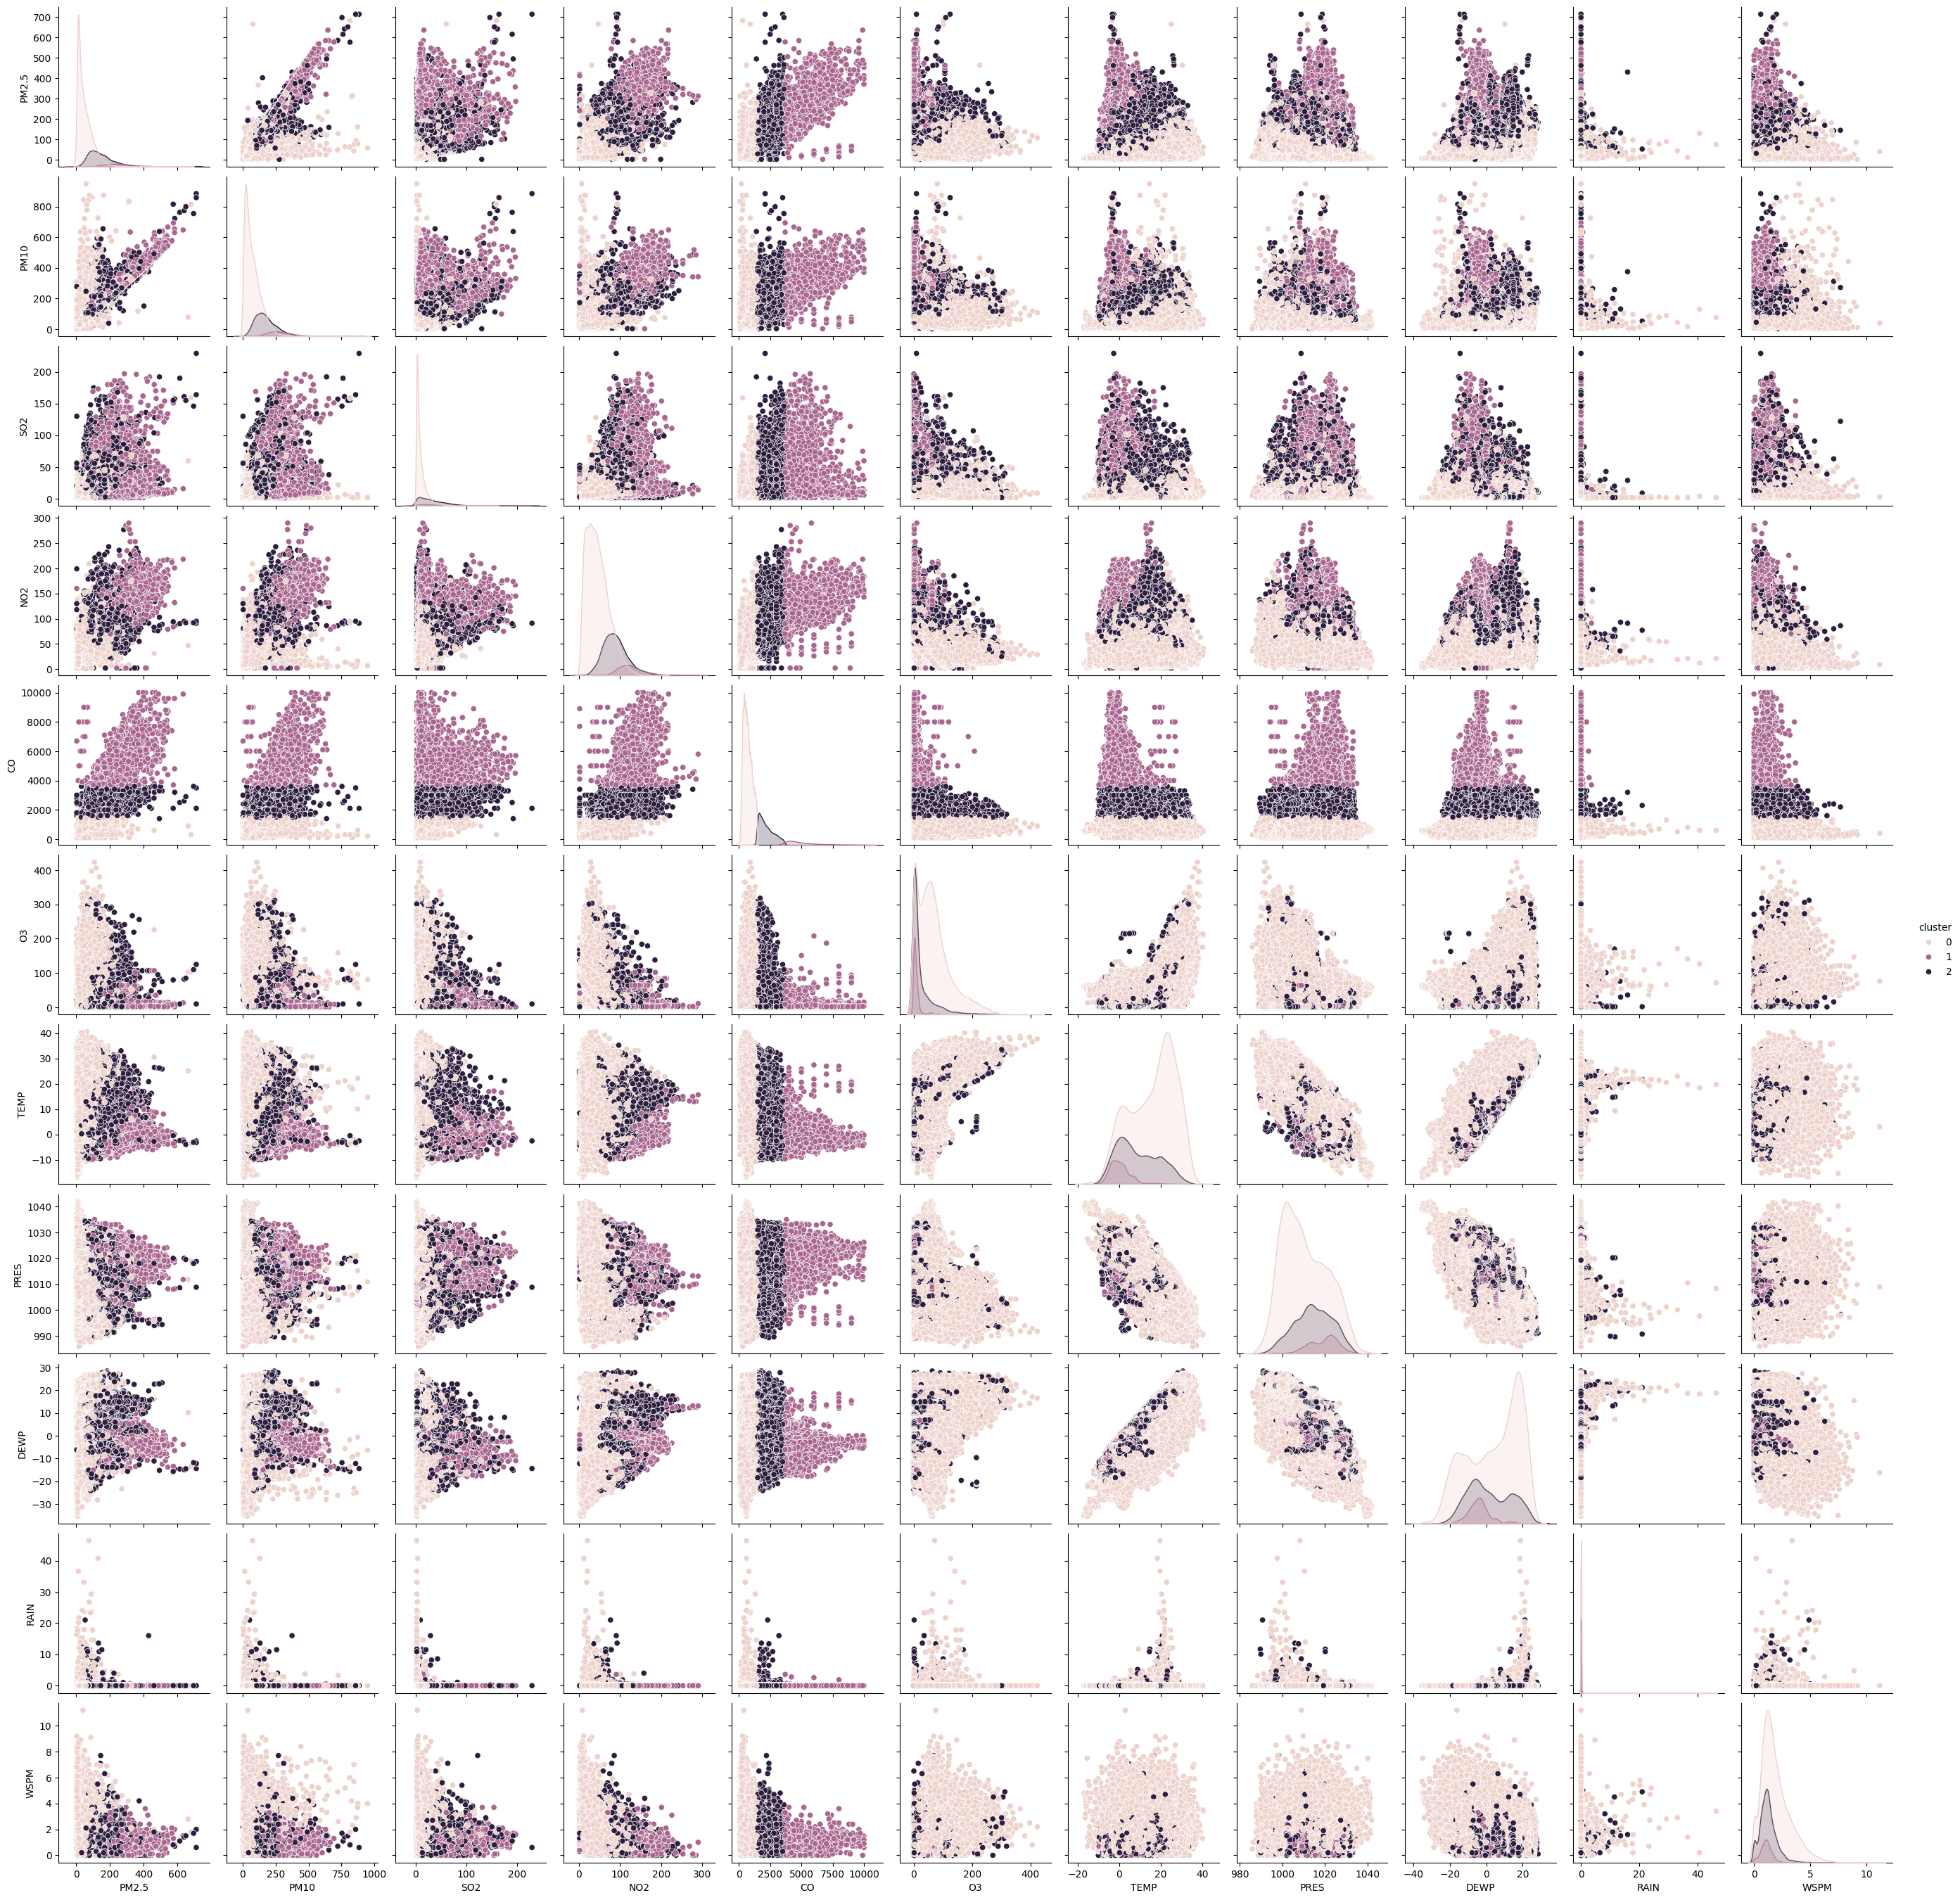

In [ ]:
imputer = SimpleImputer(strategy='mean')
scaled_data_imputed = imputer.fit_transform(scaled_data)

kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans.fit(scaled_data_imputed)

# Add cluster labels to the DataFrame
data['cluster'] = kmeans.labels_

# Calculate silhouette score
silhouette_avg = silhouette_score(scaled_data_imputed, kmeans.labels_)
print("Silhouette Score:", silhouette_avg)

# Plot pairplot with hue as 'cluster'
sns.pairplot(data, hue='cluster')
plt.show()


In [ ]:
plt.scatter(data["Temperature"], data["PM2.5"], c=data_clustered)
plt.title("Clusters of Air Quality Data")
plt.xlabel("Temperature")
plt.ylabel("PM2.5")
plt.show()